In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive
import kid_readout.analysis.resonator
import kid_readout.utils.despike

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


no data directory set up for clouds defaulting to /data
updated file list


In [3]:
snms = kid_readout.analysis.archive.load_noise_pkl('/artemis/readout/pkl/2016-03-01_163739_cw_noise_test.pkl')
snms += kid_readout.analysis.archive.load_noise_pkl('/artemis/readout/pkl/2016-03-01_165042_cw_noise_test.pkl')

In [4]:
import kid_readout.analysis.plot_resonator

In [5]:
def refit_snm(snm,debug=False,span=0.3,min_a=1.0):
    f_0 = snm.resonator_model.f_0
    freqs = snm.sweep_freqs_MHz
    s21 = snm.sweep_s21
    mask = np.abs(freqs-f_0) < span/2.0
    if mask.sum() == 0:
        mask[:] = True
    res = kid_readout.analysis.resonator.fit_best_resonator(freqs[mask],s21[mask],errors=snm.sweep_errors[mask],
                                                           delay_estimate=snm.delay_estimate_microseconds,
                                                           min_a=min_a)
    if debug:
        #fig = kid_readout.analysis.plot_resonator.amplitude_and_phase(snm.resonator_model,normalize_s21=True)
        #fig = kid_readout.analysis.plot_resonator.IQ_circle(snm.resonator_model,normalize_s21=True)
        #fig = kid_readout.analysis.plot_resonator.amplitude_and_phase(res,normalize_s21=True)
        fig = kid_readout.analysis.plot_resonator.IQ_circle(res,normalize_s21=True)
        
    return res

def logbin(f,data,bins_per_octave=12):
    if f[0] == 0:
        fmin = f[1]
    else:
        fmin = f[0]
    fmax = f[-1]
    ratio = 2**(1.0/bins_per_octave)
    nbins = np.round(np.log10(fmax/fmin)/np.log10(ratio))
    spacing = fmin*np.exp(np.log(2)*np.arange(nbins)/bins_per_octave)*(ratio-1)
    spacing = np.where(spacing<fmin,fmin,spacing)
    log_freqs = np.cumsum(spacing)
    logf = np.logspace(np.log10(fmin),np.log10(fmax),nbins)
    mapping = np.digitize(f,logf,right=True)
    total_f = np.bincount(mapping,weights=f, )
    total_data = np.bincount(mapping,weights=data)
    counts = np.bincount(mapping)
    mask = counts > 0
    total_f = total_f[mask][:-1]
    total_data = total_data[mask][:-1]
    counts = counts[mask][:-1]
    return total_f/counts, total_data/counts, counts
    
def update_fluctuation_timeseries(snm,debug=False,bins_per_octave=12.):
    new_res = refit_snm(snm,debug=debug)
    ns21 = new_res.normalize(snm.noise_measurement_freq_MHz,snm.original_timeseries)
    x_raw = kid_readout.analysis.resonator.normalized_s21_to_detuning(ns21,new_res)
    x_deglitch,x_mask = kid_readout.utils.despike.deglitch_mask_mad(x_raw,thresh=5,mask_extend=20,window_length=2**10)
    print "masked",x_mask.sum(),"samples", 100*(x_mask.sum(dtype='float')/x_mask.shape[0]),'%'
    pxx_full,fr_full = mlab.psd(x_deglitch-x_deglitch.mean(),NFFT=2**20,Fs=snm.timeseries_sample_rate)
    fr_binned, pxx_binned, binned_counts = logbin(fr_full,pxx_full,bins_per_octave=bins_per_octave)
    snm.new_res = new_res
    snm.x_raw = x_raw
    snm.x_deglitch = x_deglitch
    snm.x_mask = x_mask
    snm.pxx_full = pxx_full
    snm.fr_full = fr_full
    snm.fr_binned = fr_binned
    snm.pxx_binned = pxx_binned
    snm.binned_counts = binned_counts
    if debug:
        fig,axs = subplots(1,1,figsize=(18,6))
        axs.loglog(fr_full,pxx_full,lw=0.5,color='k')
        axs.loglog(fr_binned,pxx_binned,'r',lw=2)

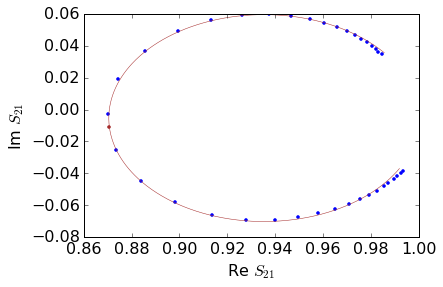

masked 549240 samples 3.27372550964 %


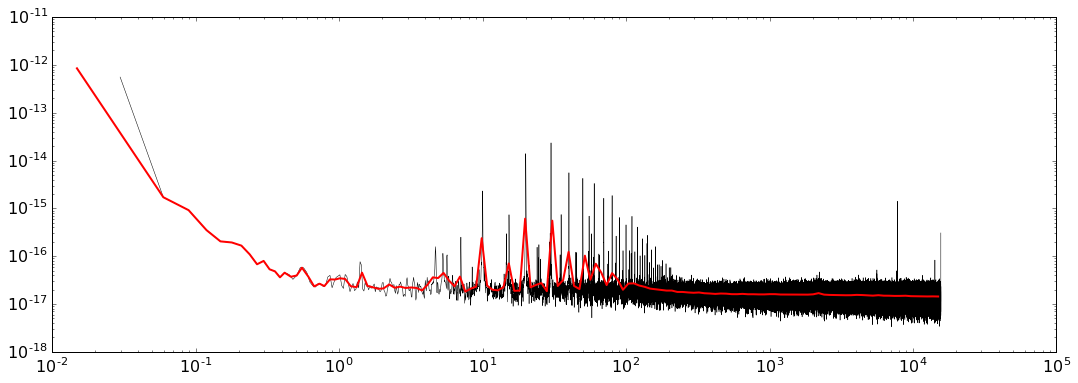

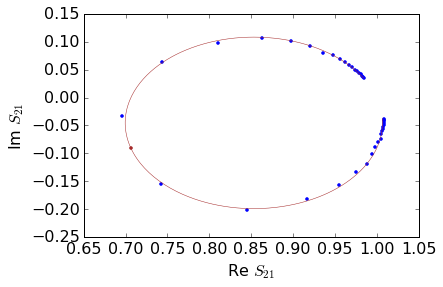

masked 286305 samples 1.70651078224 %


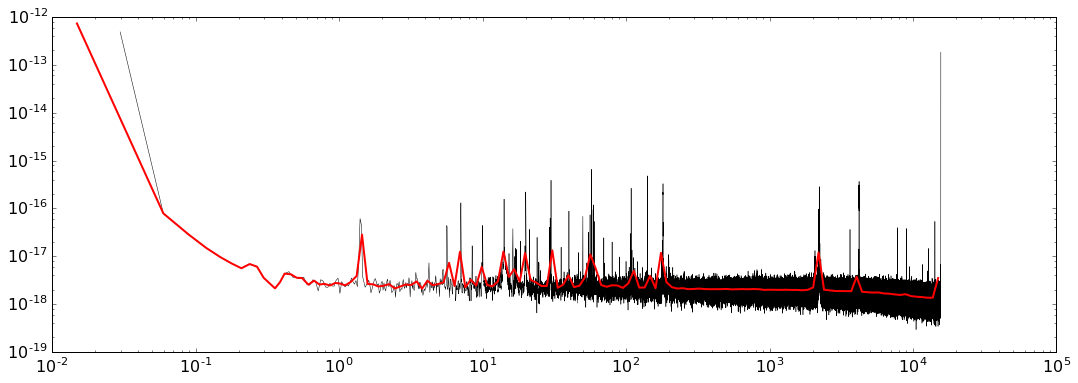

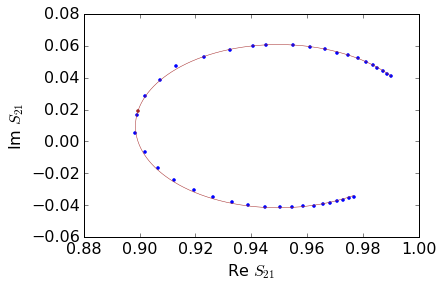

masked 562509 samples 3.3528149128 %


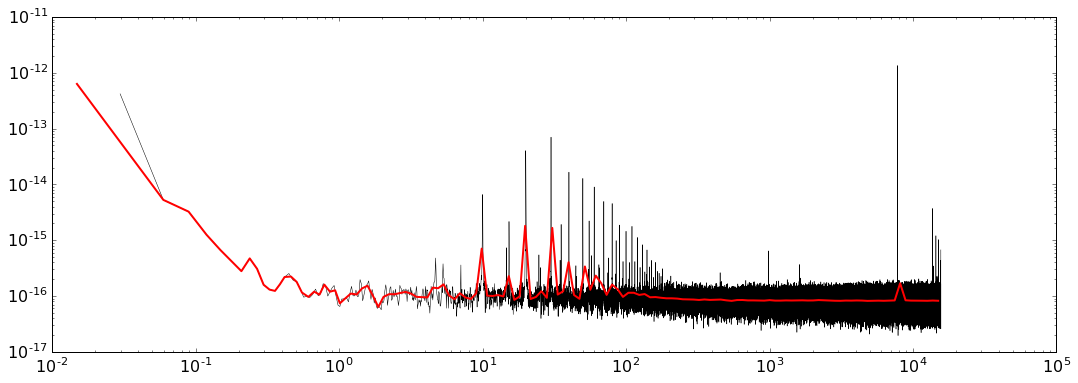

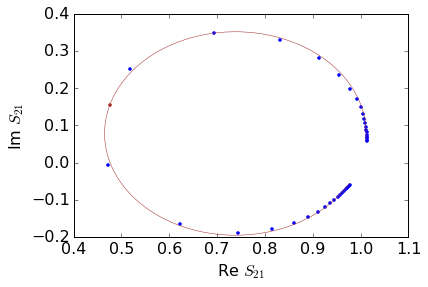

masked 511581 samples 3.04926037788 %


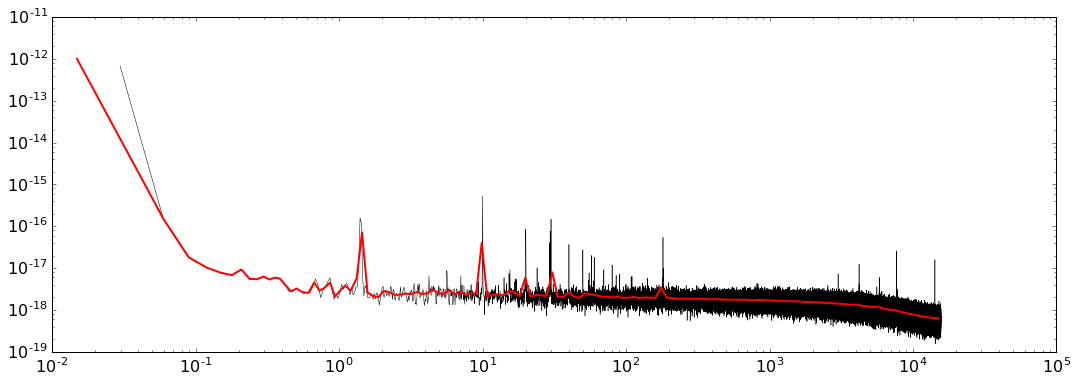

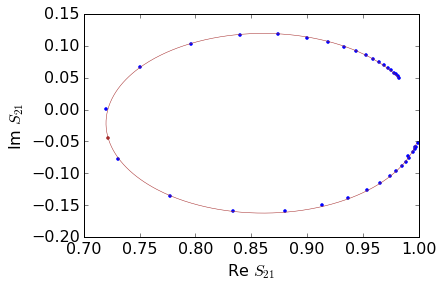

masked 523370 samples 3.11952829361 %


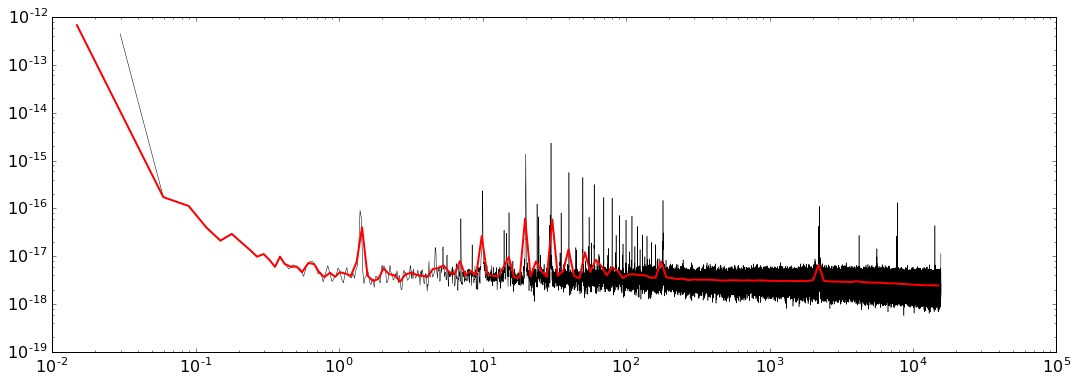

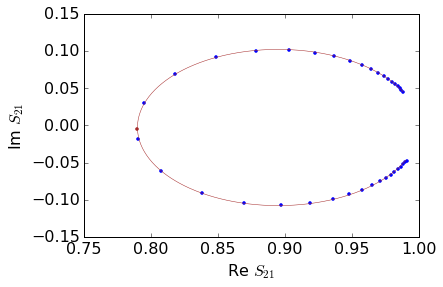

masked 515383 samples 3.07192206383 %


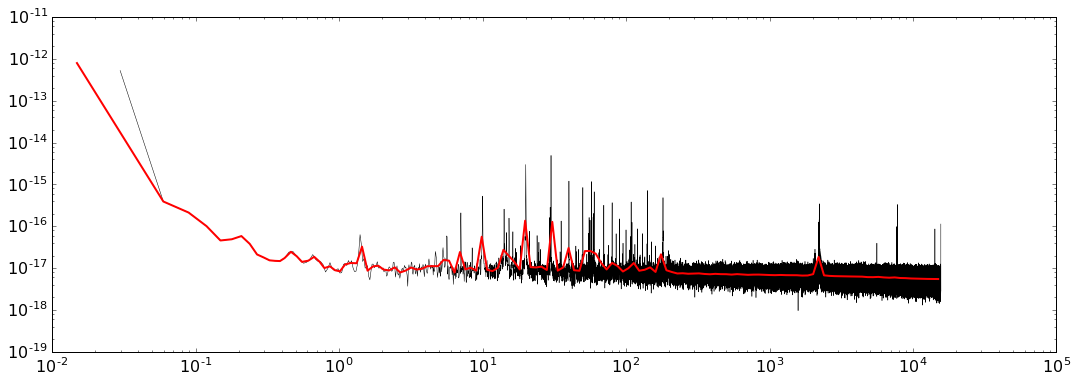

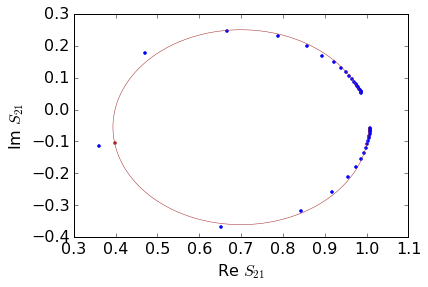

masked 843743 samples 5.02910017967 %


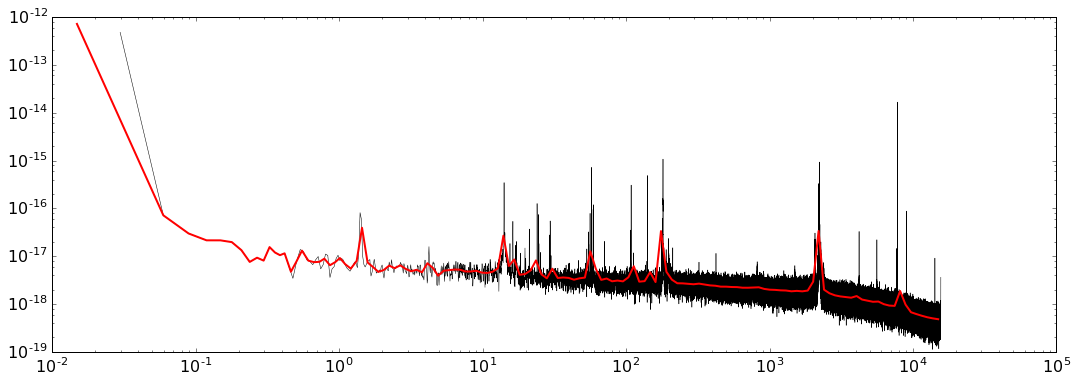

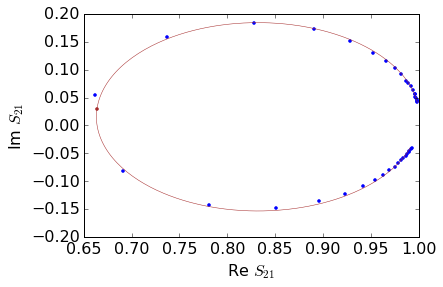

masked 442174 samples 2.63556241989 %


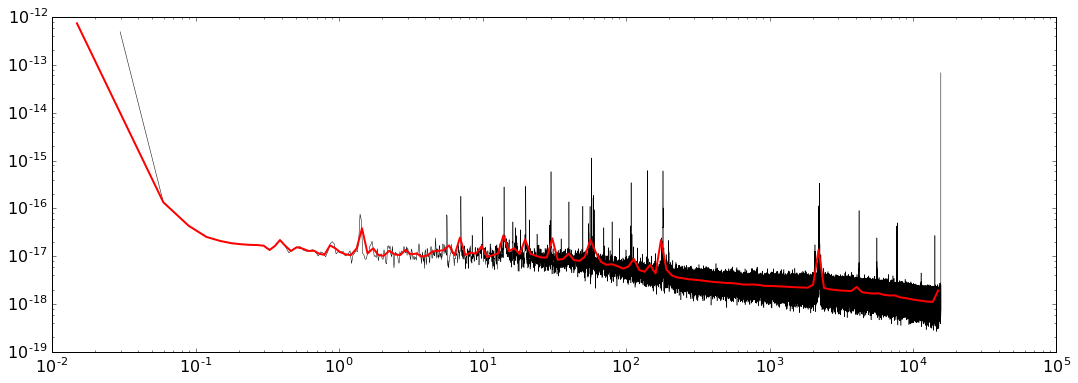

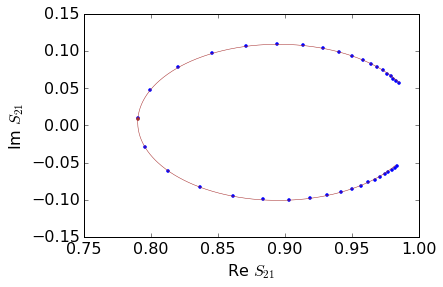

masked 1694186 samples 10.0981354713 %


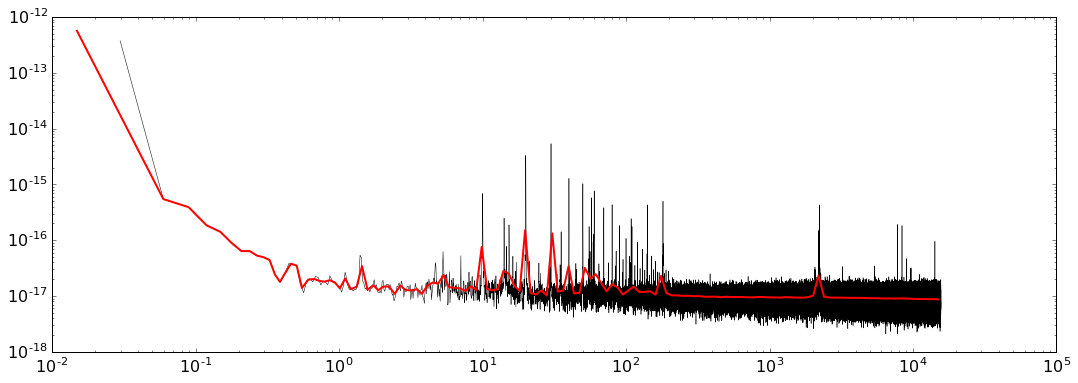

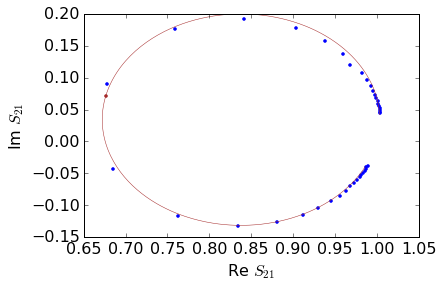

masked 383922 samples 2.28835344315 %


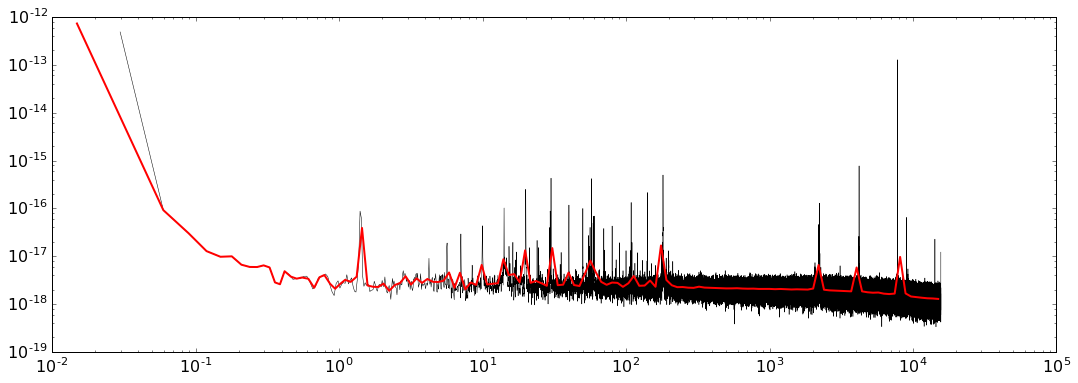

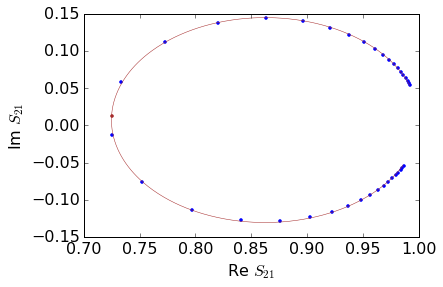

masked 526736 samples 3.13959121704 %


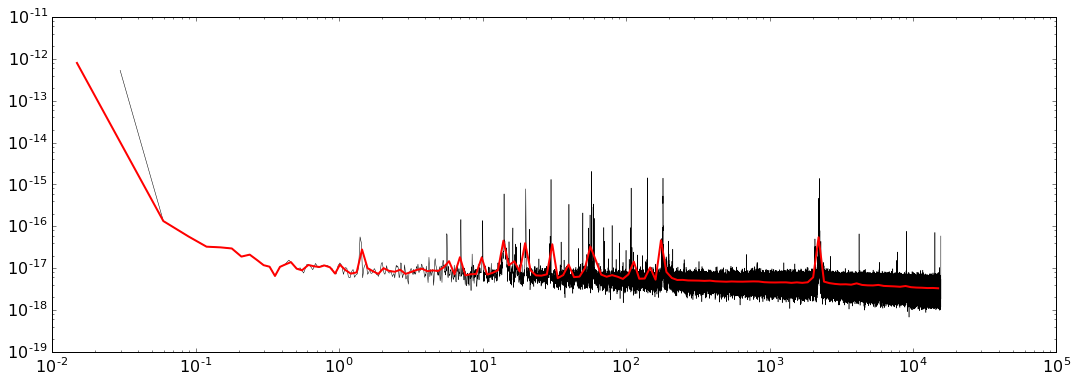

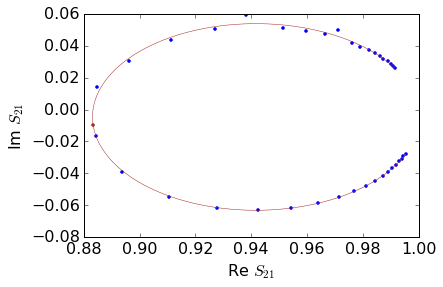

masked 287802 samples 1.71543359756 %


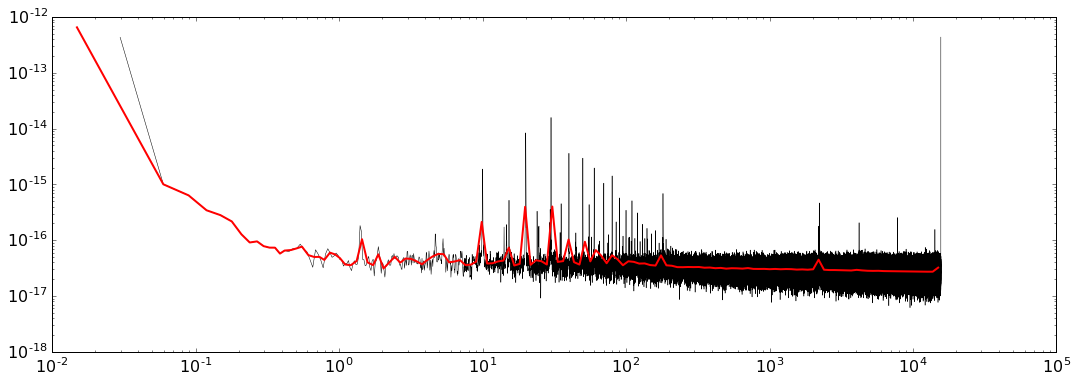

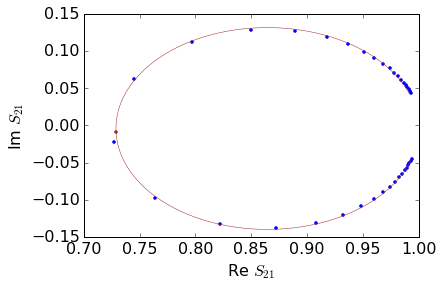

masked 358035 samples 2.13405489922 %


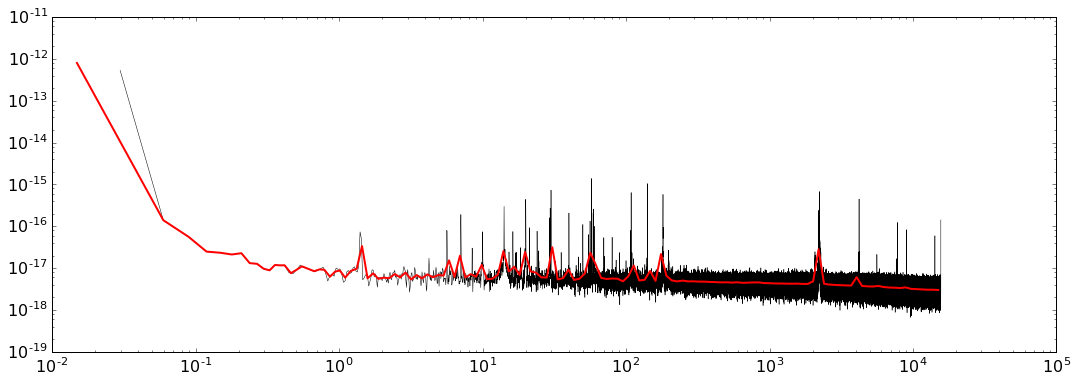

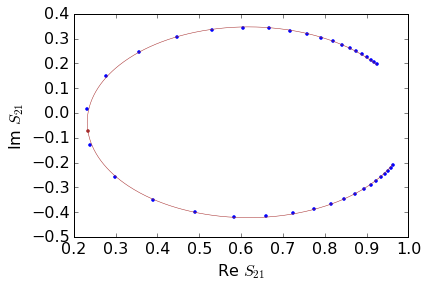

masked 524138 samples 3.12410593033 %


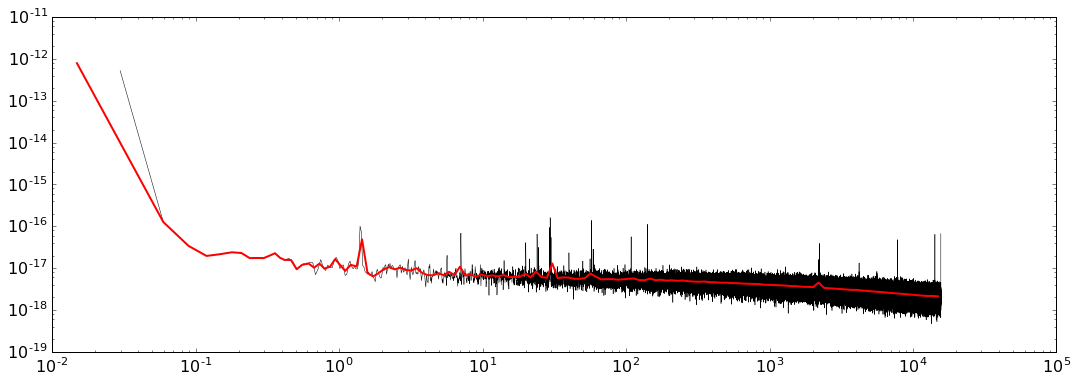

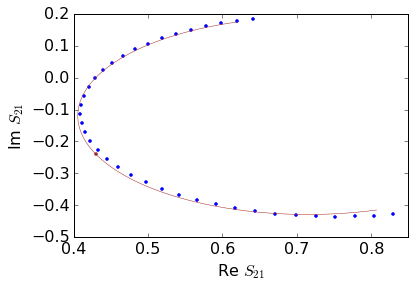

masked 547733 samples 3.26474308968 %


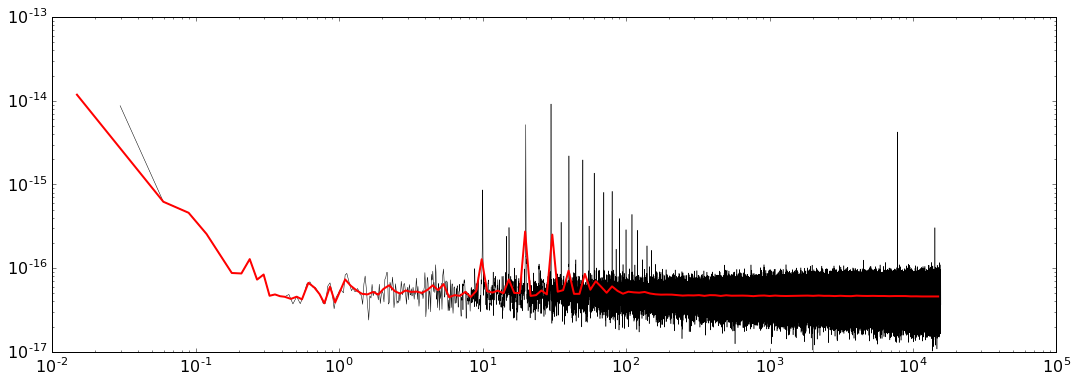

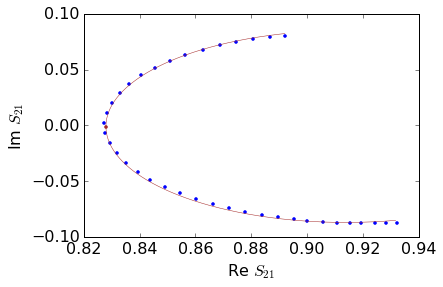

masked 2269298 samples 13.526070118 %


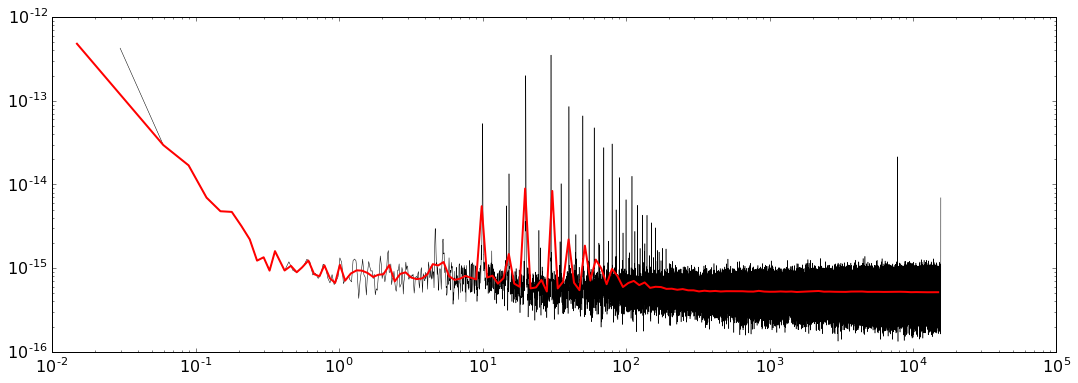

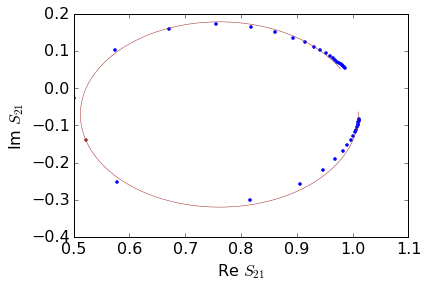

masked 513658 samples 3.0616402626 %


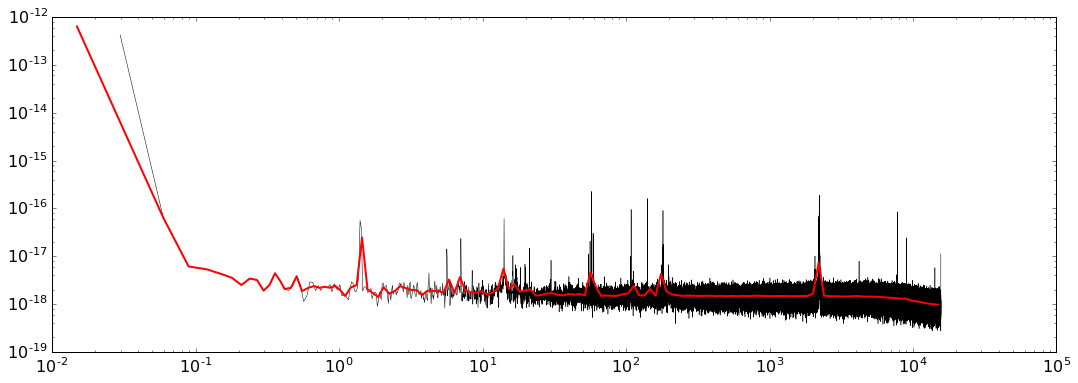

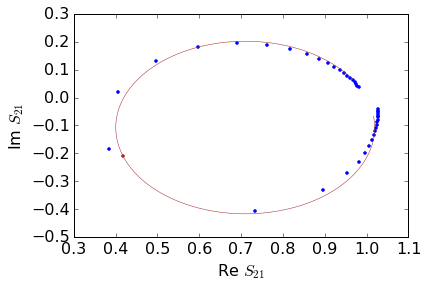

masked 510356 samples 3.0419588089 %


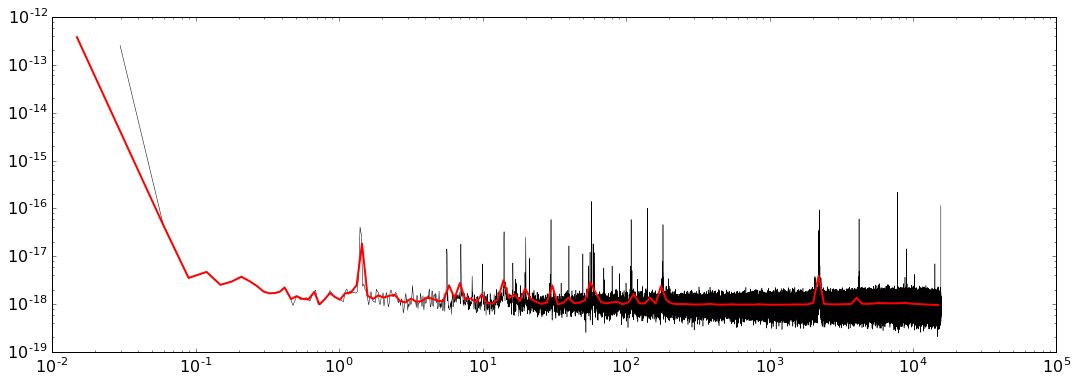

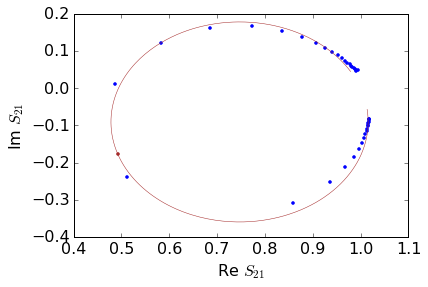

masked 520411 samples 3.10189127922 %


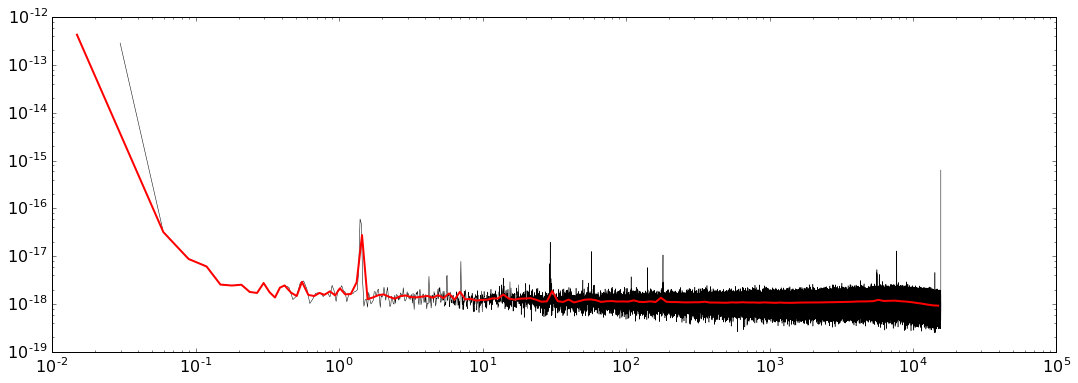

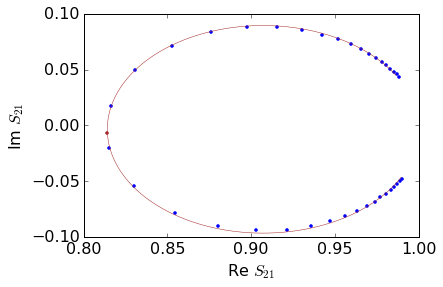

masked 742541 samples 4.42588925362 %


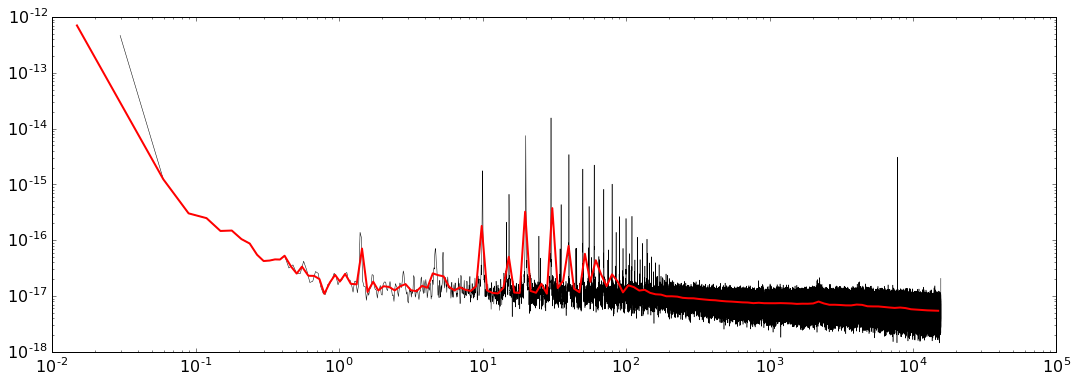

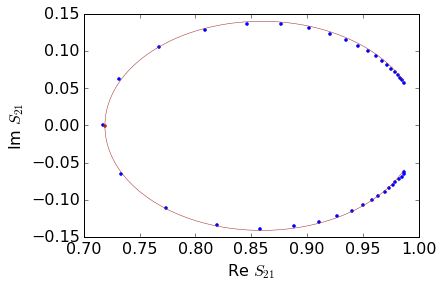

masked 418973 samples 2.49727368355 %


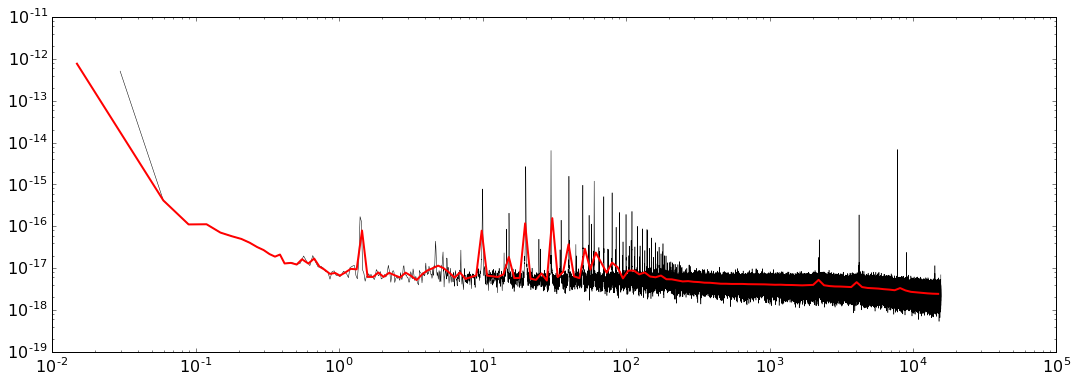

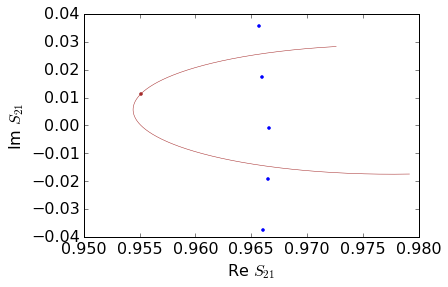

masked 1137633 samples 6.78082108498 %


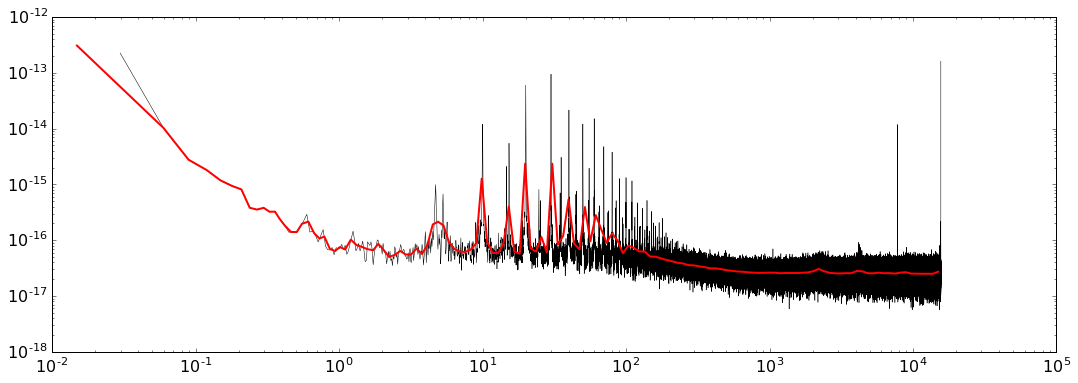

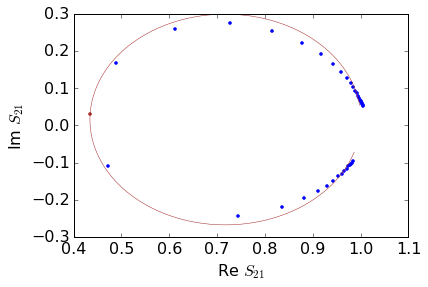

masked 500465 samples 2.98300385475 %


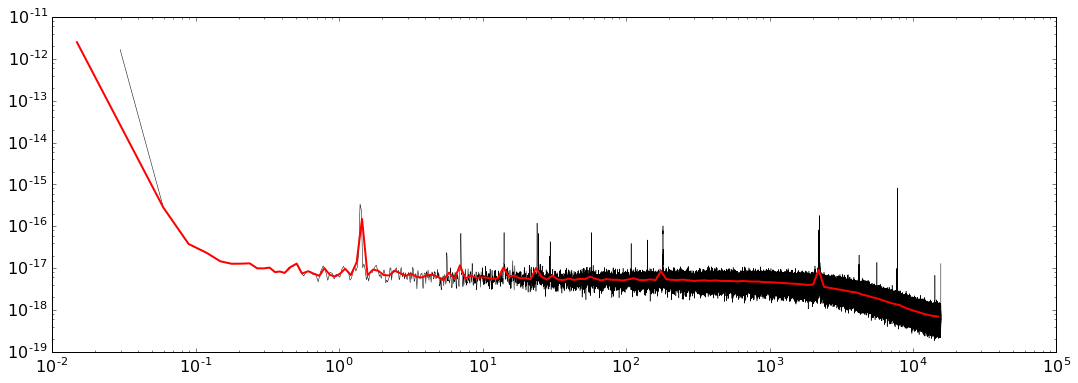

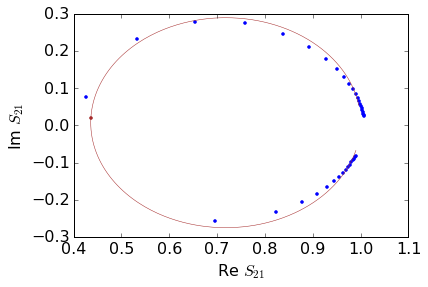

masked 525340 samples 3.13127040863 %


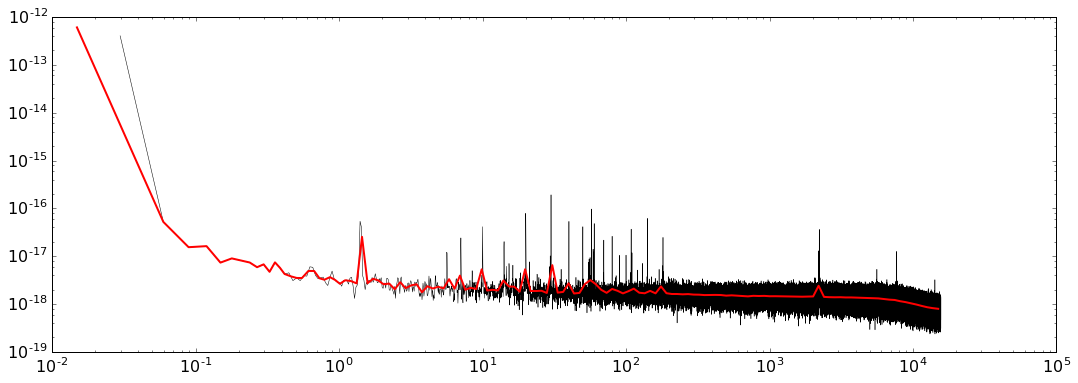

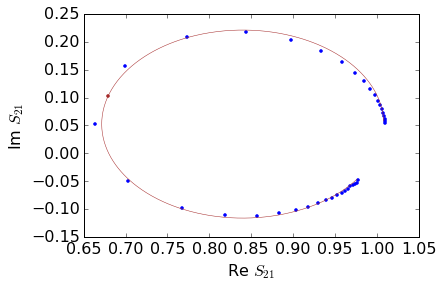

masked 524201 samples 3.12448143959 %


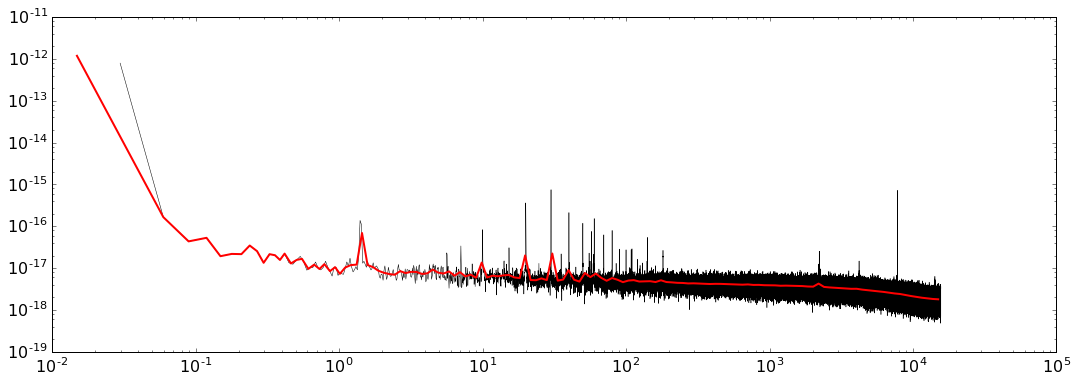

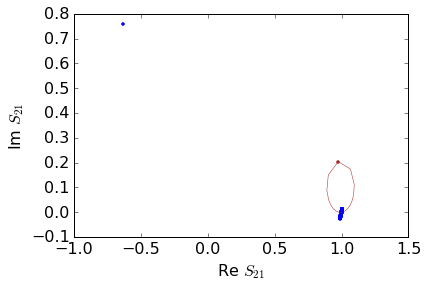

masked 1599866 samples 9.53594446182 %


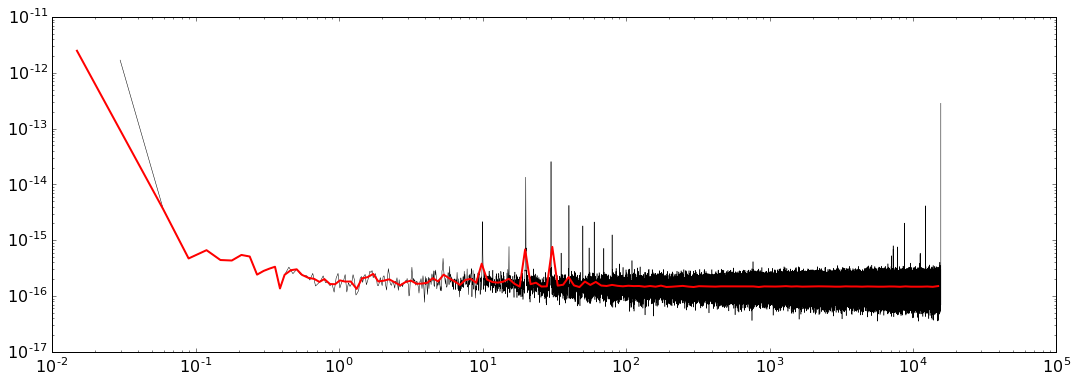

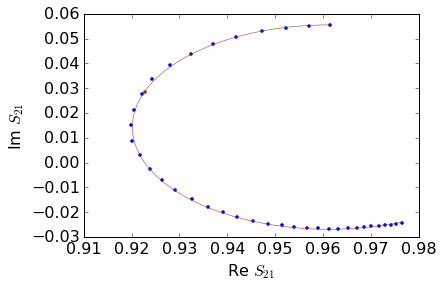

masked 224922 samples 1.34063959122 %


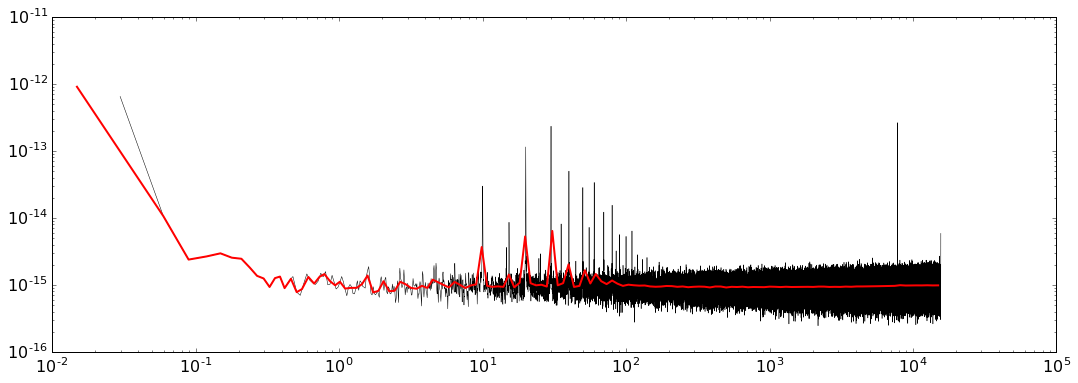

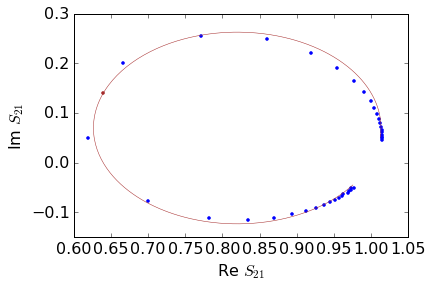

masked 523448 samples 3.11999320984 %


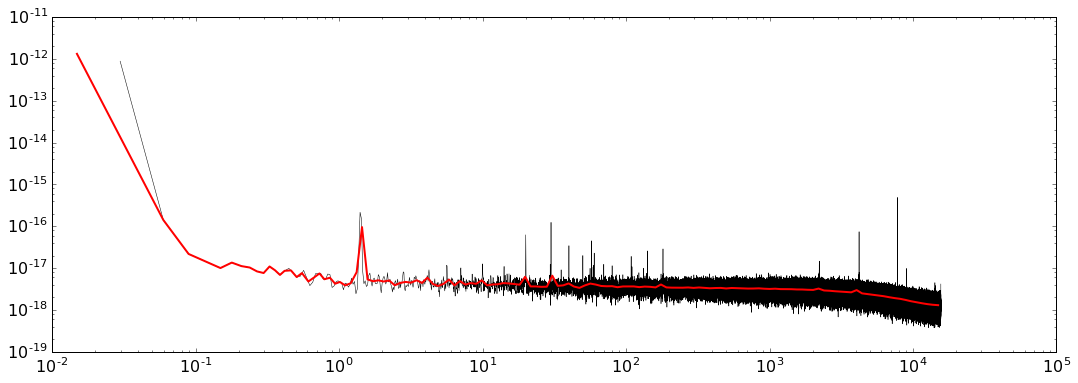

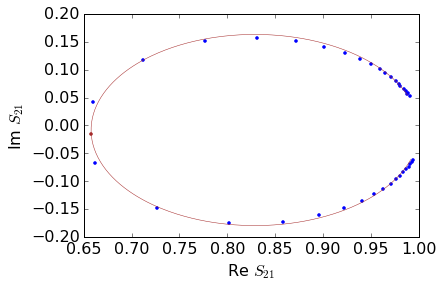

masked 521938 samples 3.11099290848 %


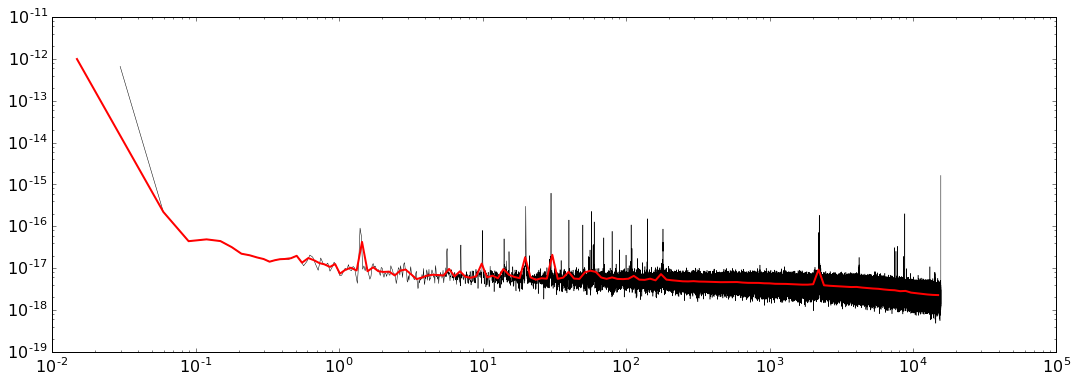

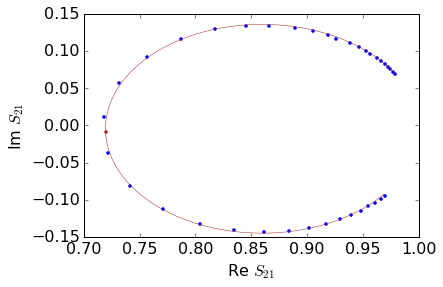

masked 523676 samples 3.12135219574 %


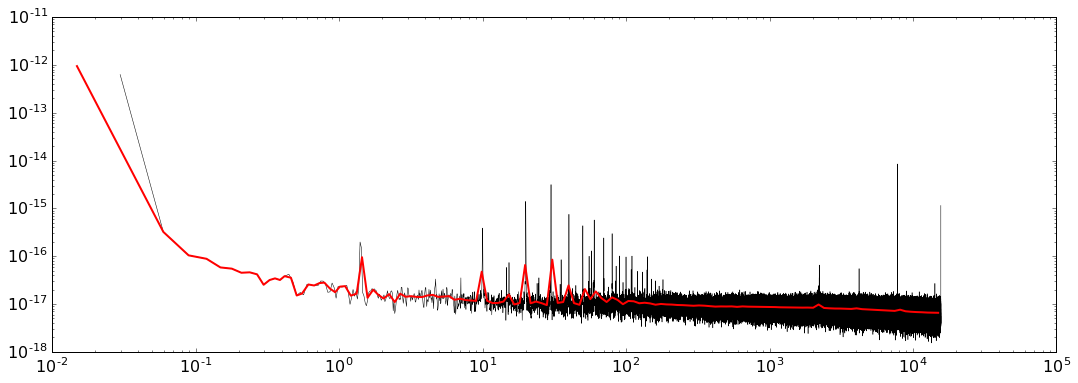

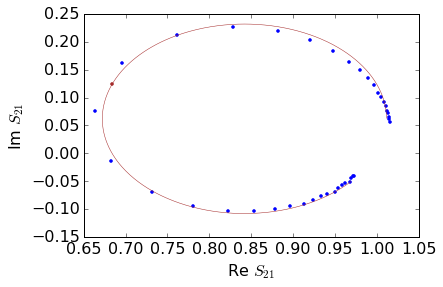

masked 507539 samples 3.02516818047 %


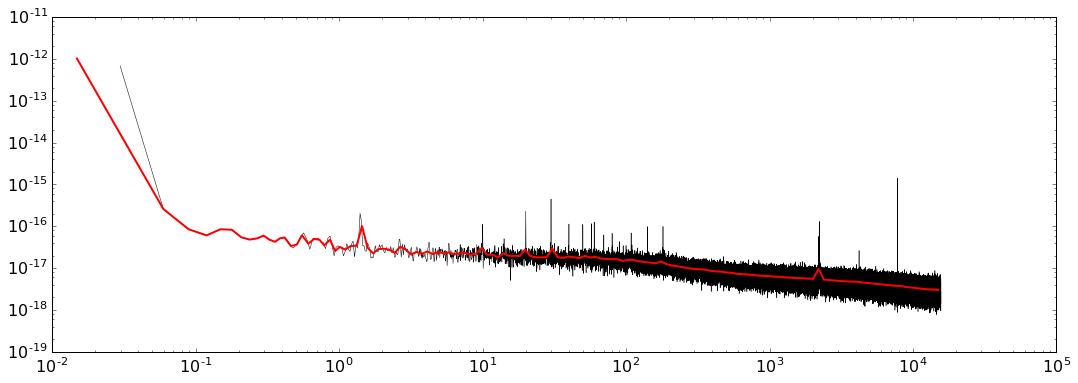

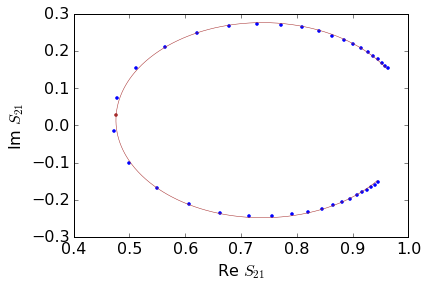

masked 521095 samples 3.10596823692 %


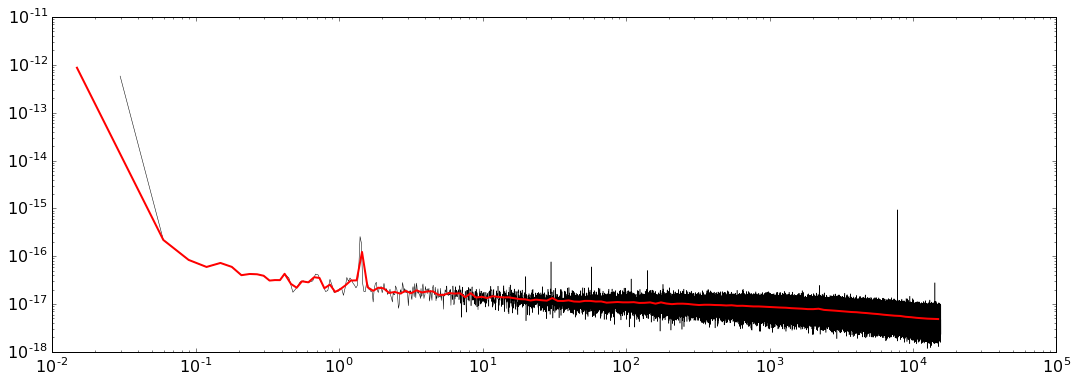

In [6]:
for snm in snms:
    update_fluctuation_timeseries(snm,debug=True,bins_per_octave=8.)

In [7]:
for snm in snms:
    print snm.resonator_model.f_0, snm.pxx_binned[102]/1e-18, snm.pxx_binned[4]/1e-18

1038.93957902 16.0700481361 203.957704377
1060.04364304 1.98798973449 9.54015677534
1061.57731826 84.4673512634 666.787169743
1063.38062593 1.69160743197 7.82019063177
1089.83930249 3.05165754462 21.1632699163
1092.43155207 6.84796292406 45.8121925977
1095.3464455 1.99316137914 21.4268019181
1109.08571407 2.39118564505 20.7545597815
1116.76227054 9.47173823439 141.195343485
1126.93619465 2.0693563222 9.72305736348
1129.40127163 4.55616426772 31.3772300613
1139.18220467 30.2695280443 281.747138373
1141.39250403 4.34230437428 23.2917311428
1159.77613942 3.98800680402 21.6240675016
1199.66767065 46.4743828099 141.8730841
1241.13599854 522.302507148 4783.85060841
1434.54776983 1.4616177518 4.30268616803
1455.34336795 0.965498647118 2.51517687518
1459.62604928 1.07004649378 2.54777260387
1482.39414222 7.43449968012 146.753582333
1484.38175774 4.04035477851 70.7072994524
1490.01462463 26.2666649866 1183.30627322
1496.60645417 4.61131648331 14.5390272355
1499.18449898 1.45381354358 7.33998525

In [30]:
import h5py

In [38]:
ls -htrl /artemis/readout/archive/2016-03-03-jpl-park-2015-10-40nm-long-timestreams.h5

-rwxrwxr-x 1 500 500 1.6G Mar  3  2016 /artemis/readout/archive/2016-03-03-jpl-park-2015-10-40nm-long-timestreams.h5*


In [31]:
h5 = h5py.File('/artemis/readout/archive/2016-03-03-jpl-park-2015-10-40nm-long-timestreams.h5','w')

In [37]:
snm.timeseries_sample_rate

31250.0

1038.93957902
1060.04364304
1063.38062593
1089.83930249
1092.43155207
1095.3464455
1109.08571407
1116.76227054
1126.93619465
1129.40127163
1141.39250403
1159.77613942
1434.54776983
1455.34336795
1459.62604928
1482.39414222
1484.38175774
1496.60645417
1499.18449898
1519.37958616
1531.60670165
1554.96581404
1568.79066179
1595.88411645
1610.05090344


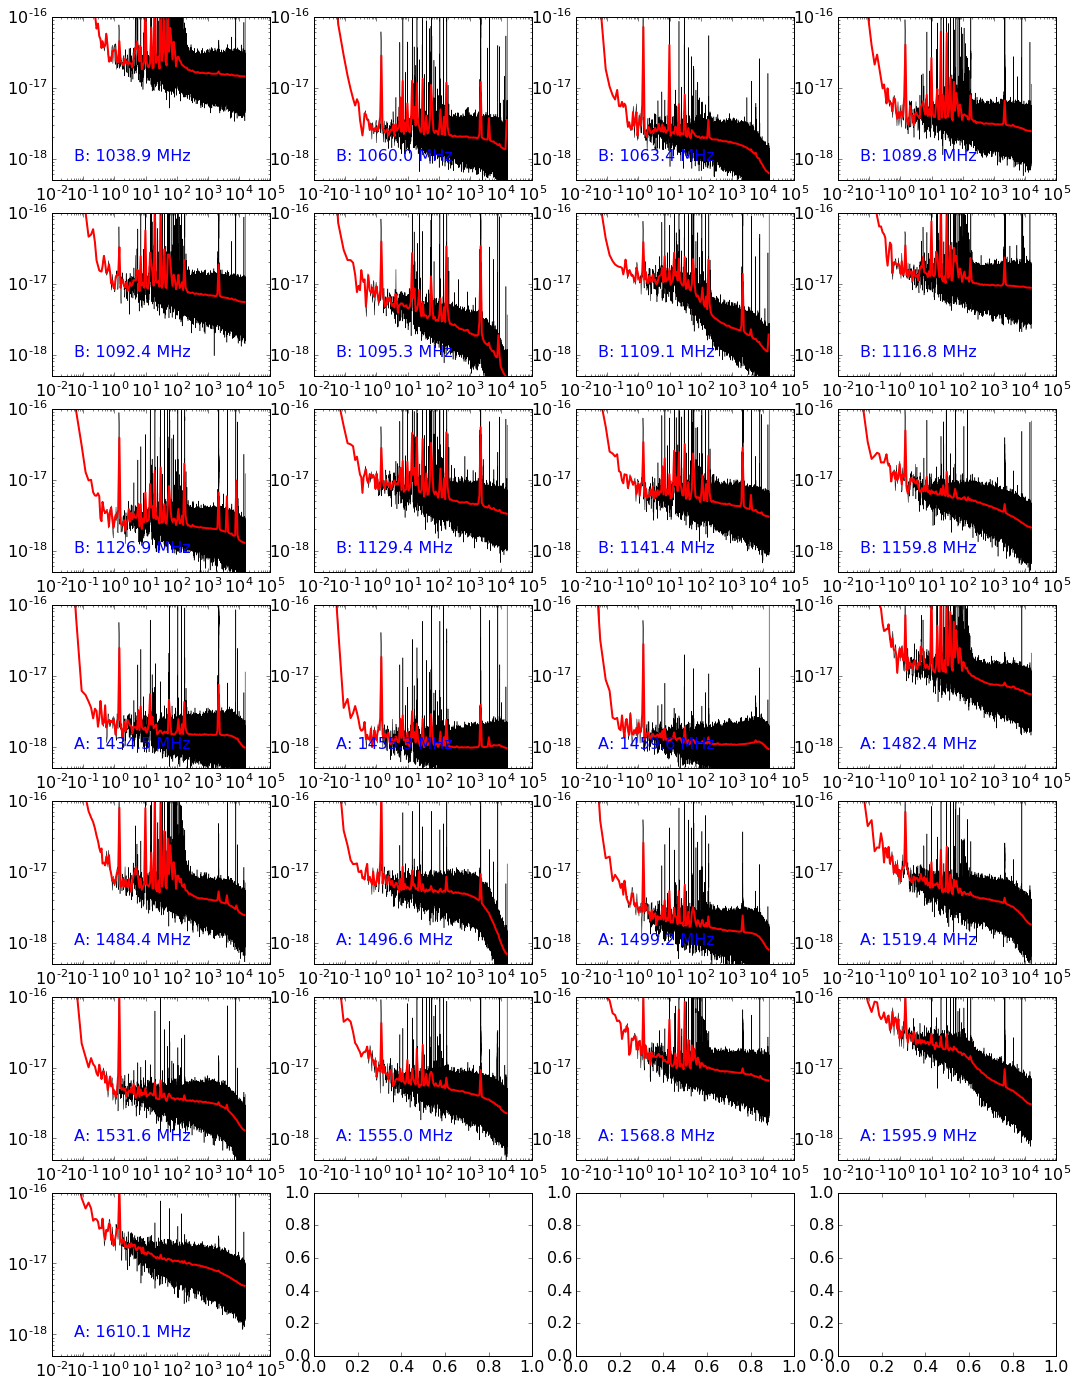

In [36]:
fig,axs = subplots(7,4,figsize=(18,24))
axs = axs.flatten()
k = 0
for snm in snms:
    if snm.pxx_binned[102] < 20e-18:
        ax = axs[k]
        ax.loglog(snm.fr_full,snm.pxx_full,'k',lw=0.5)
        ax.loglog(snm.fr_binned,snm.pxx_binned,'r',lw=2)
        f0 = snm.resonator_model.f_0
        if f0 < 1200:
            pol = 'B'
        else:
            pol = 'A'
        ax.text(0.1,0.1,('%s: %.1f MHz' % (pol,f0)),ha='left',va='bottom',transform=ax.transAxes,color='blue')
        ax.set_ylim(5e-19,1e-16)
        k += 1
        print snm.resonator_model.f_0
        h5.create_dataset(('pol_%s_%.1f_MHz' % (pol,f0)).replace('.','_'),data=snm.x_deglitch,dtype=snm.x_deglitch.dtype,shape=snm.x_deglitch.shape)
fig.savefig('/artemis/readout/plots/2016-03-03-jpl-park-noise-summary.png',bbox_inches='tight')
h5.close()

(0.05, 20000.0)

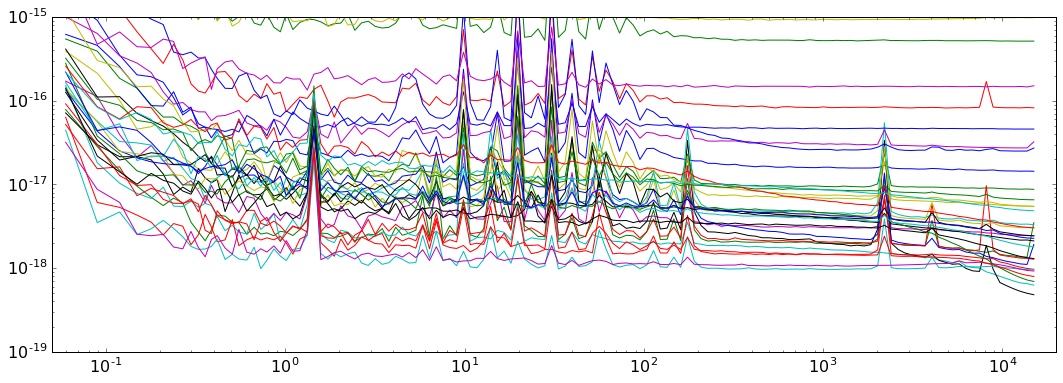

In [8]:
figure(figsize=(18,6))
for snm in snms:
    loglog(snm.fr_binned[1:],snm.pxx_binned[1:])
ylim(1e-19,1e-15)
xlim(5e-2,2e4)

(1e-18, 1e-16)

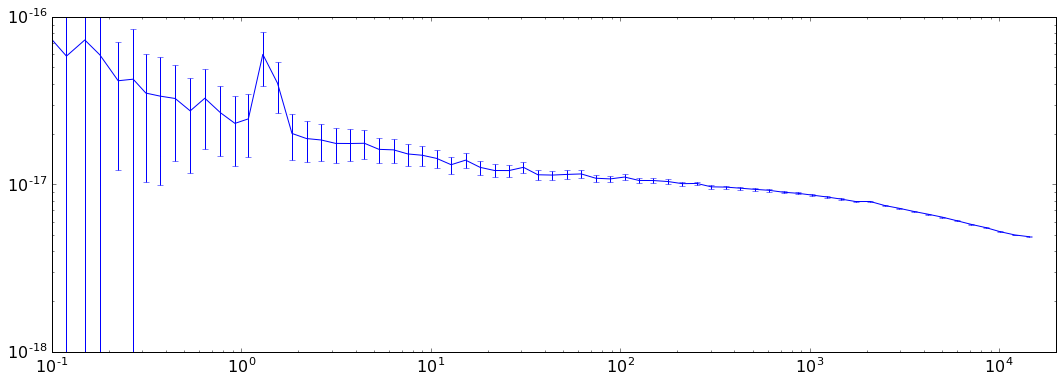

In [162]:
figure(figsize=(18,6))
errorbar(snm.fr_binned,snm.pxx_binned,yerr=snm.pxx_binned/np.sqrt(snm.binned_counts))
yscale('log')
xscale('log')
xlim(0.1,2e4)
ylim(1e-18,1e-16)

In [163]:
snm.binned_counts

array([    2,     1,     1,     1,     1,     1,     2,     1,     2,
           2,     3,     3,     4,     5,     5,     6,     8,     9,
          11,    13,    16,    18,    22,    26,    32,    37,    44,
          53,    63,    75,    90,   107,   127,   152,   181,   215,
         257,   307,   365,   435,   519,   618,   737,   878,  1047,
        1249,  1487,  1774,  2113,  2520,  3003,  3579,  4267,  5085,
        6062,  7225,  8613, 10265, 12237, 14585, 17384, 20722, 24700,
       29440, 35093, 41828, 49858, 59428, 70836, 84433])

In [26]:
low = [snm for snm in snms if np.abs(snm.resonator_model.f_0-1129.4)<.1][0]
high = [snm for snm in snms if np.abs(snm.resonator_model.f_0-1555.)<.1][0]


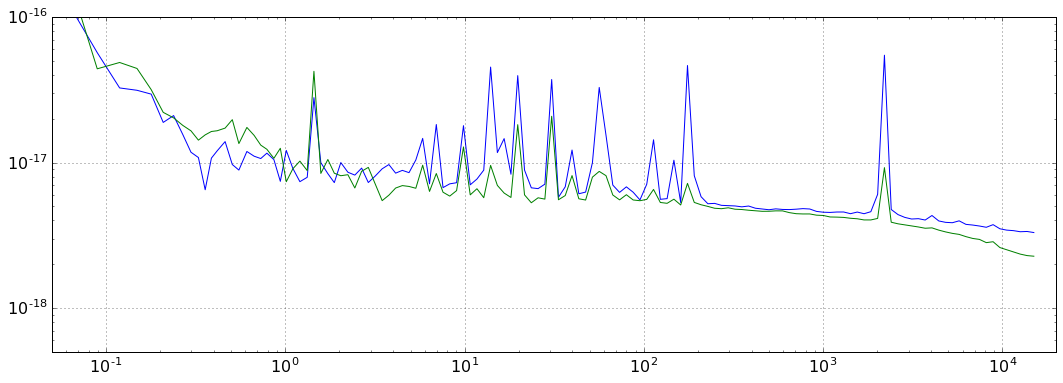

In [27]:
figure(figsize=(18,6))
loglog(low.fr_binned,low.pxx_binned)
loglog(high.fr_binned,high.pxx_binned)
ylim(5e-19,1e-16)
xlim(5e-2,2e4)
grid()

In [25]:
2**(1/12.)

1.0594630943592953

In [105]:
np.log10(fr_clean[-1]/fr_clean[1])/np.log10(_104)

203.99999999999983

In [113]:
spacing = fr_clean[1]*np.exp(np.log(2)*np.arange(204)/12.)*(_104-1)
delta = np.where(spacing < fr_clean[1], fr_clean[1],spacing)

In [115]:
logf = np.cumsum(delta)

In [119]:
(np.digitize(fr_clean,logf)).shape

(131073,)

In [120]:
fr_clean.shape

(131073,)

In [121]:
total = np.bincount(np.digitize(fr_clean,logf),weights=fr_clean)
counts = np.bincount(np.digitize(fr_clean,logf))

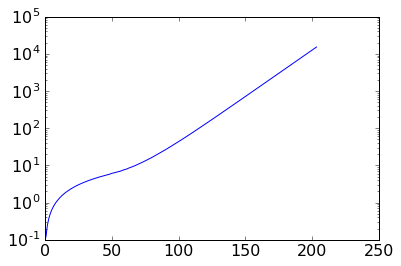

In [123]:
semilogy(total/counts)

In [101]:
np.logspace(np.log10(fr_clean[1]),np.log10(fr_clean[-1]),100)

array([  1.19209290e-01,   1.34277151e-01,   1.51249567e-01,
         1.70367268e-01,   1.91901415e-01,   2.16157444e-01,
         2.43479396e-01,   2.74254799e-01,   3.08920163e-01,
         3.47967173e-01,   3.91949662e-01,   4.41491467e-01,
         4.97295275e-01,   5.60152596e-01,   6.30954979e-01,
         7.10706670e-01,   8.00538846e-01,   9.01725664e-01,
         1.01570233e+00,   1.14408547e+00,   1.28869602e+00,
         1.45158512e+00,   1.63506314e+00,   1.84173248e+00,
         2.07452449e+00,   2.33674104e+00,   2.63210134e+00,
         2.96479470e+00,   3.33953996e+00,   3.76165242e+00,
         4.23711922e+00,   4.77268424e+00,   5.37594383e+00,
         6.05545445e+00,   6.82085412e+00,   7.68299907e+00,
         8.65411775e+00,   9.74798427e+00,   1.09801137e+01,
         1.23679824e+01,   1.39312754e+01,   1.56921661e+01,
         1.76756306e+01,   1.99098018e+01,   2.24263686e+01,
         2.52610254e+01,   2.84539782e+01,   3.20505151e+01,
         3.61016485e+01,

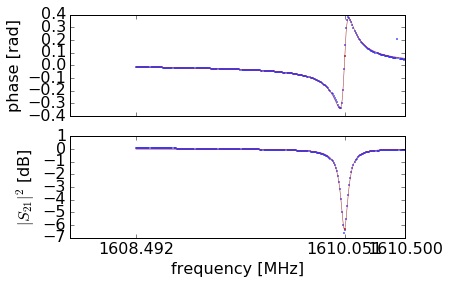

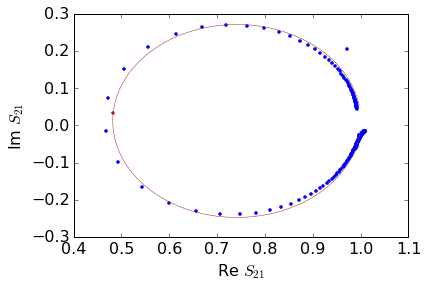

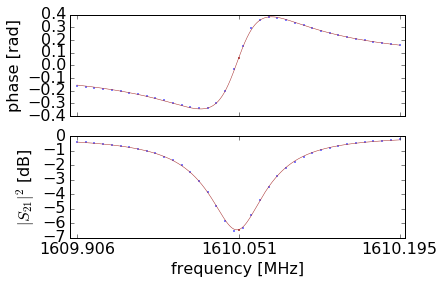

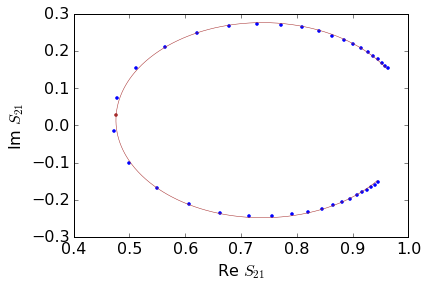

In [95]:
res = refit_snm(snms[-1],debug=True,span=0.3,min_a=1)

In [69]:
res.Q_e

(76568.13308594712-22572.151983720833j)

In [7]:
ts = snm.normalized_timeseries[:]

In [8]:
x = kid_readout.analysis.resonator.normalized_s21_to_detuning(ts,snm.resonator_model)

In [27]:
cx,mask = kid_readout.utils.despike.deglitch_mask_mad(x,thresh=5,mask_extend=20,window_length=2**10)

In [13]:
mask

(array([ -2.02895012e-06,  -1.97816121e-06,  -1.81945359e-06, ...,
         -1.14588795e-06,  -6.41542897e-07,  -8.33143474e-07], dtype=float32),
 array([False, False, False, ..., False, False, False], dtype=bool))

In [15]:
clean = x.copy()
clean[mask] = clean[np.roll(mask,126)]

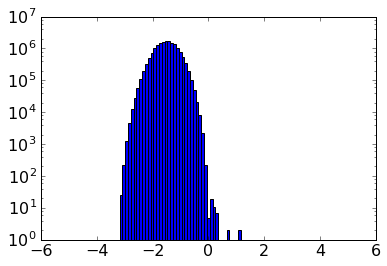

In [28]:
blah = hist(1e6*cx,bins=np.linspace(-5,5,100),log=True)

In [41]:
pxx_clean,fr_clean = mlab.psd(cx-cx.mean(),NFFT=2**16,Fs=512e6/2**14)

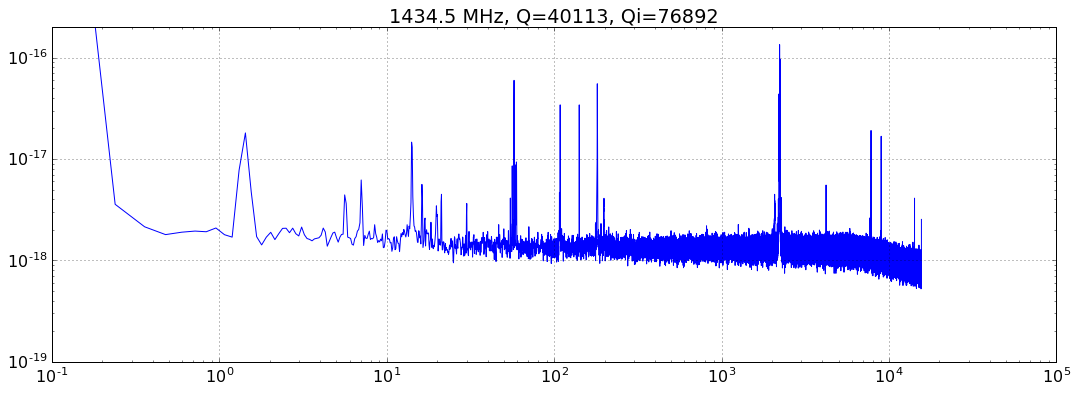

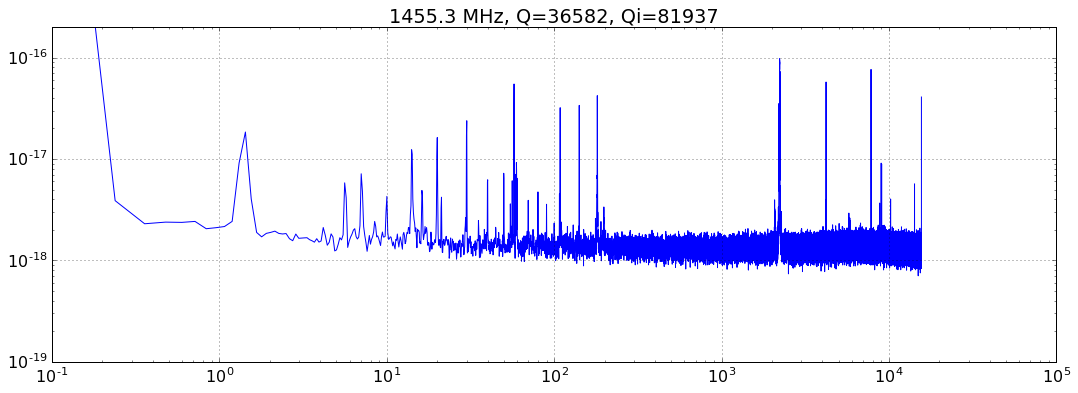

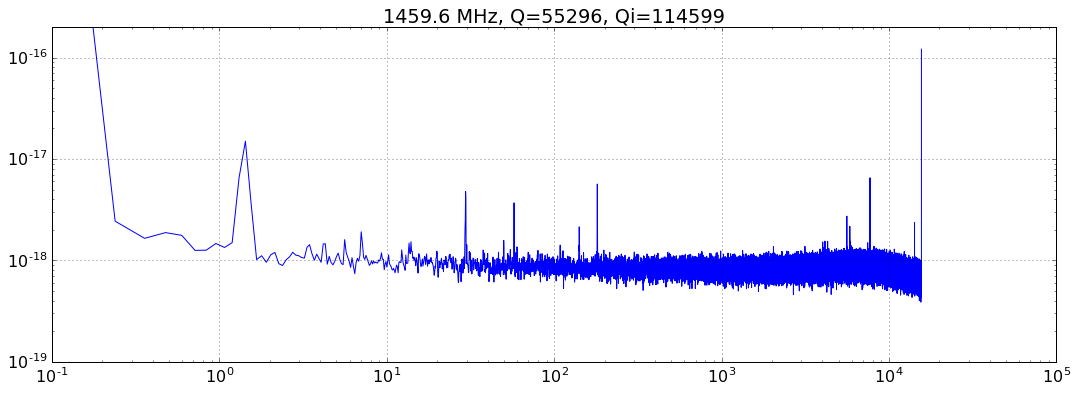

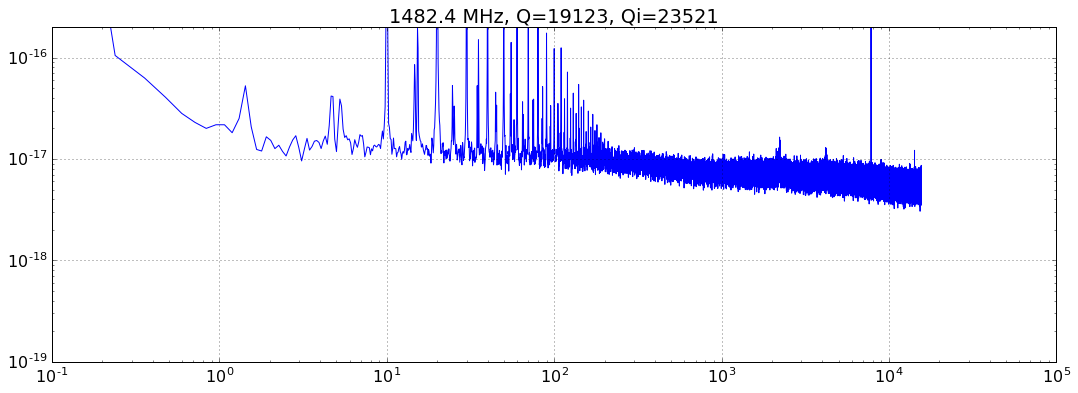

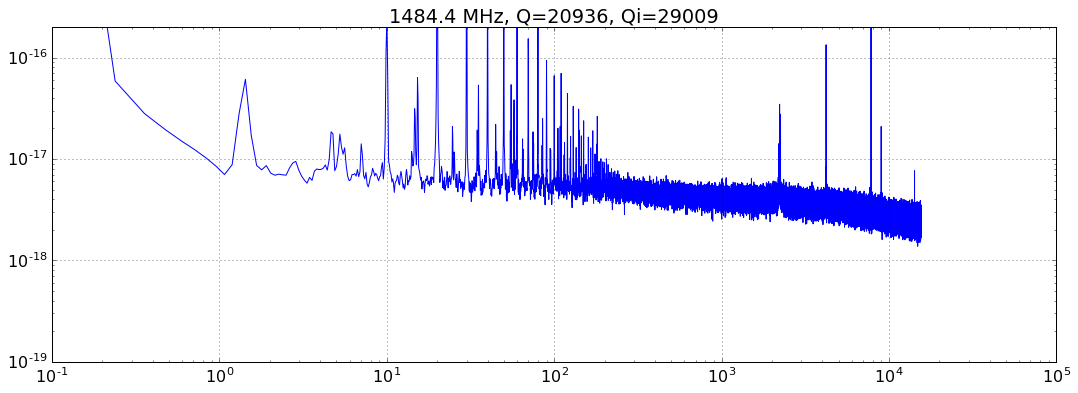

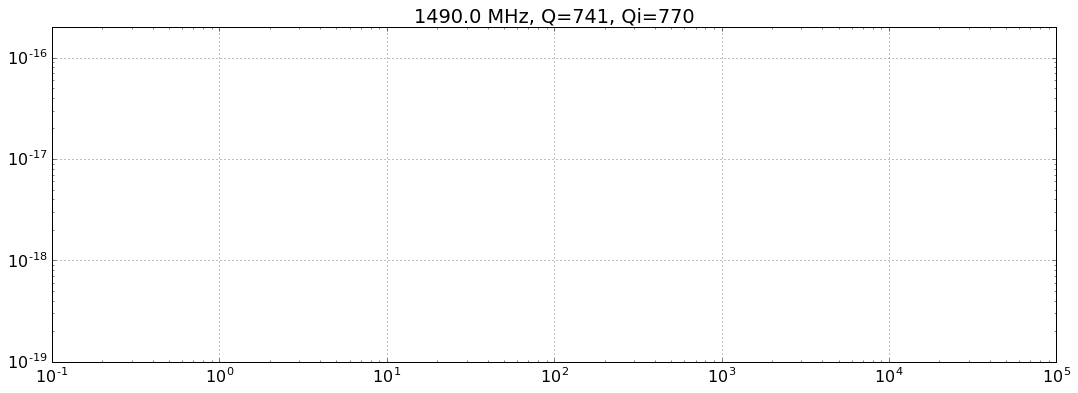

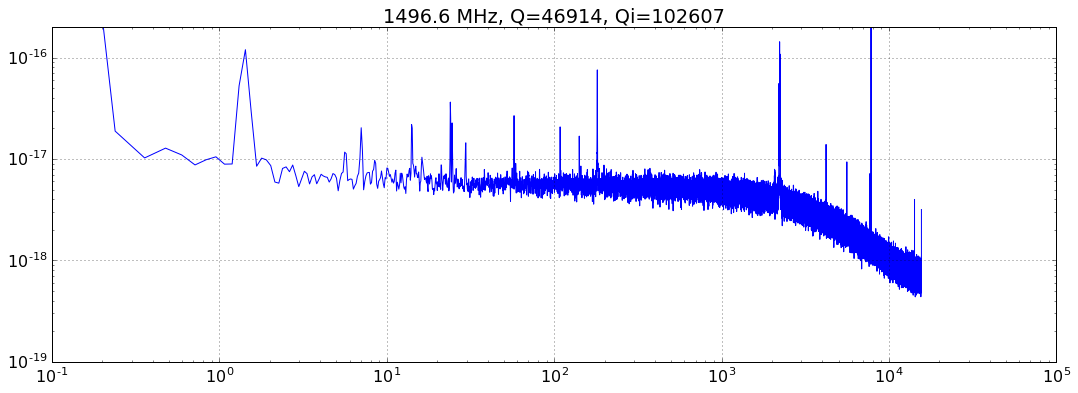

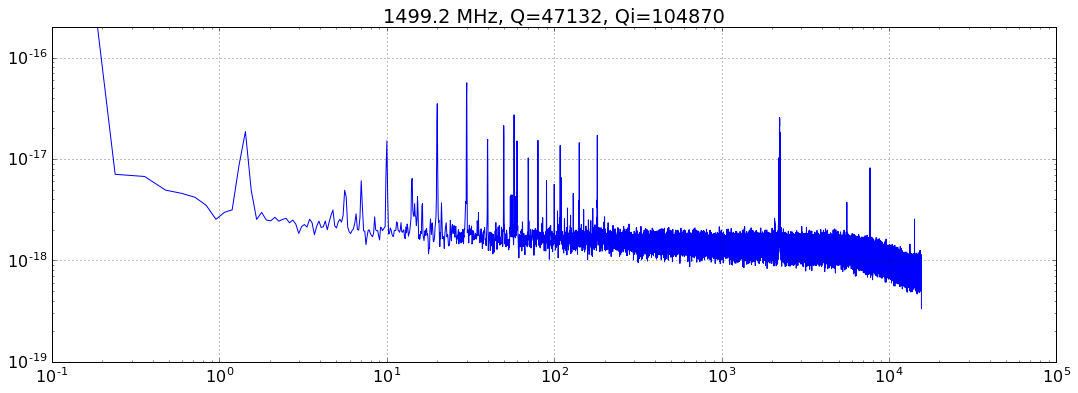

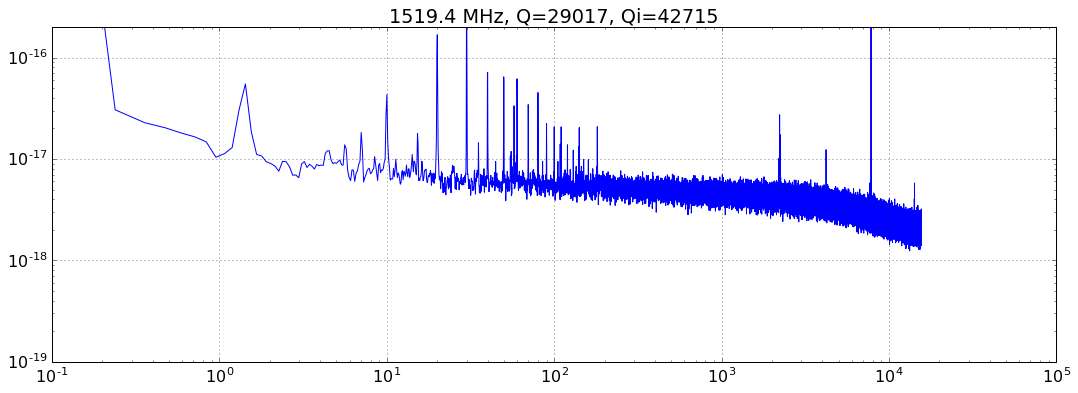

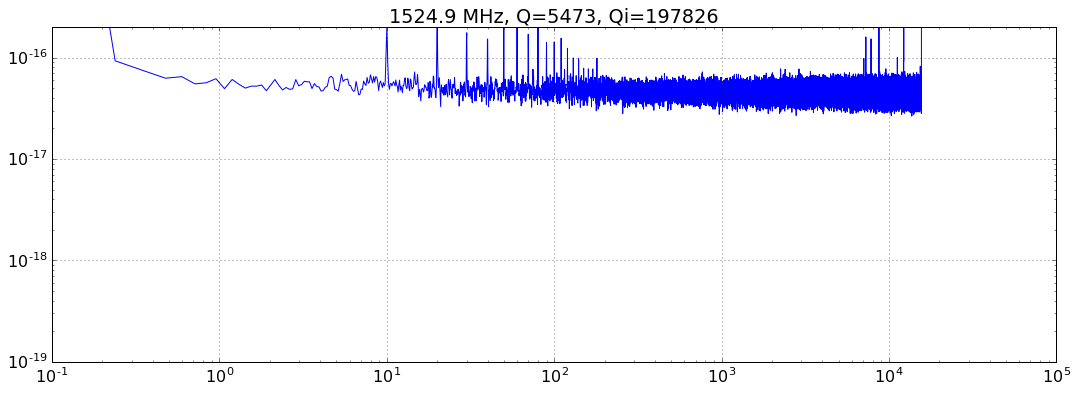

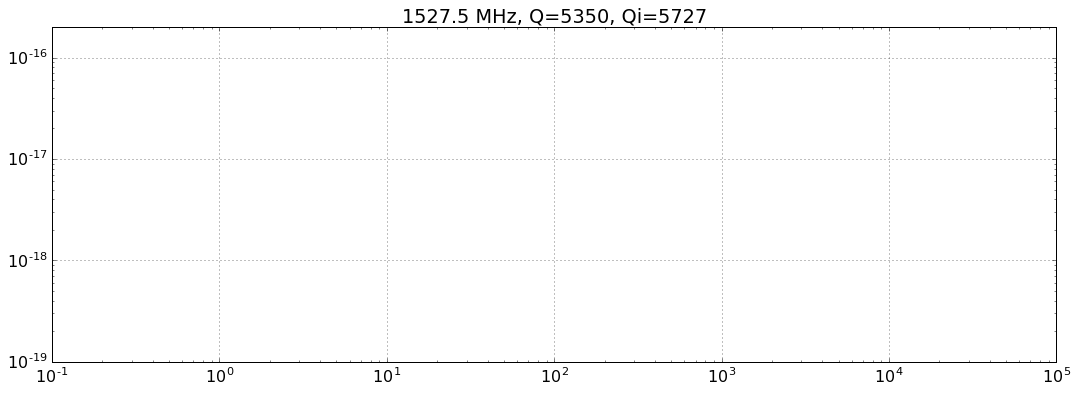

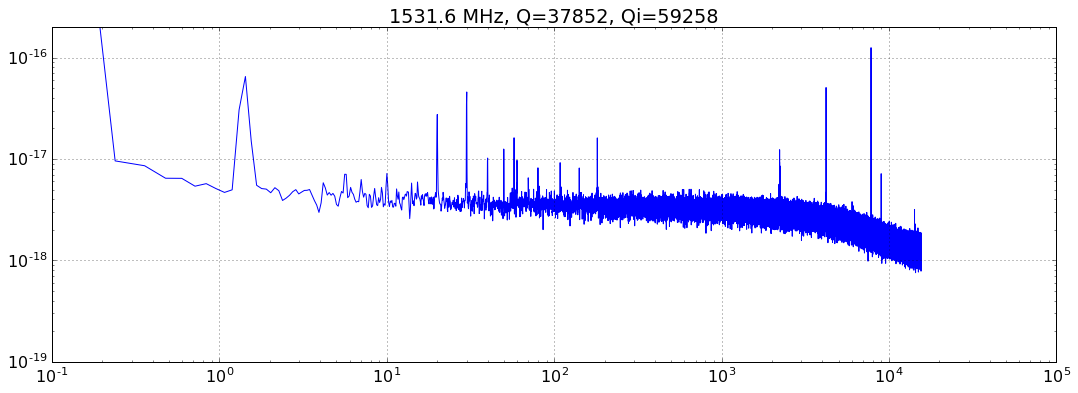

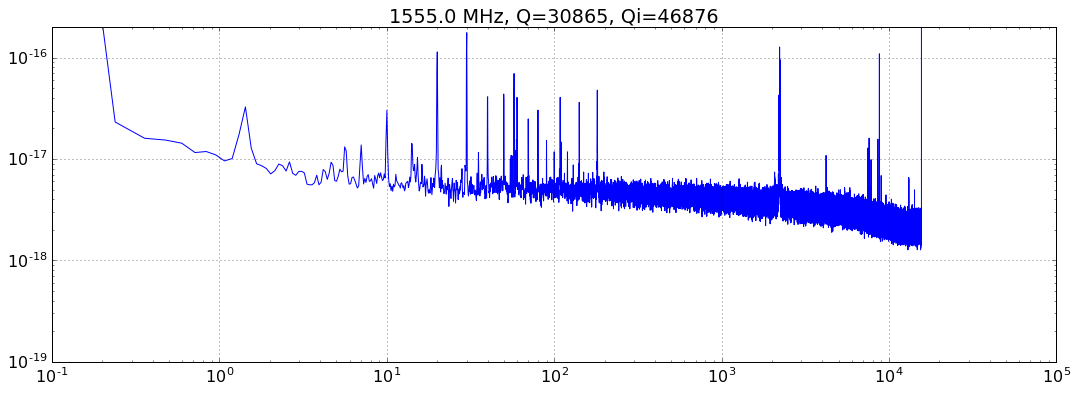

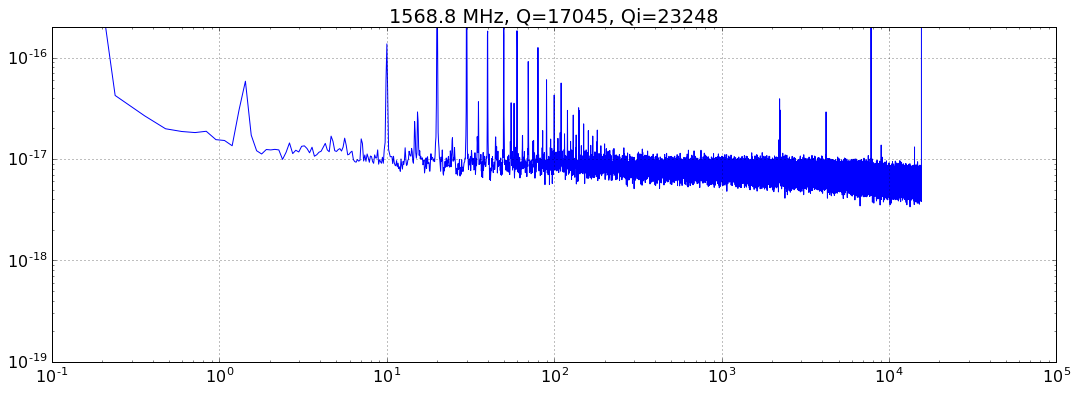

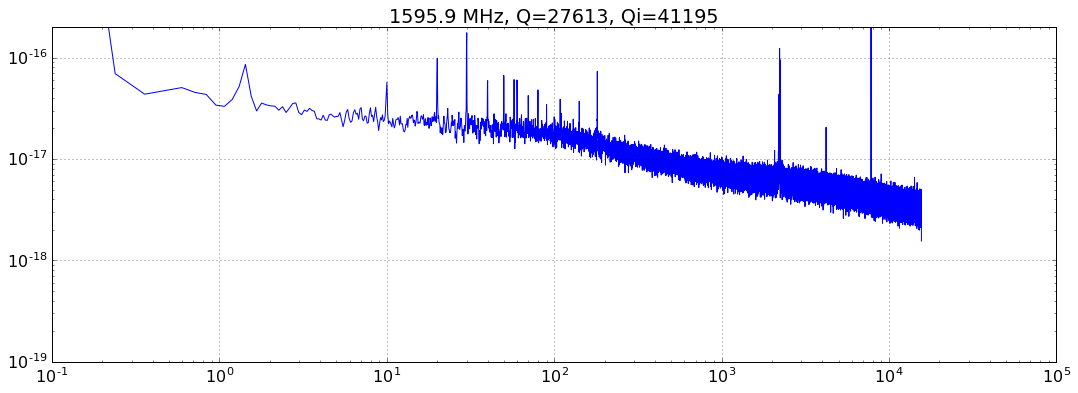

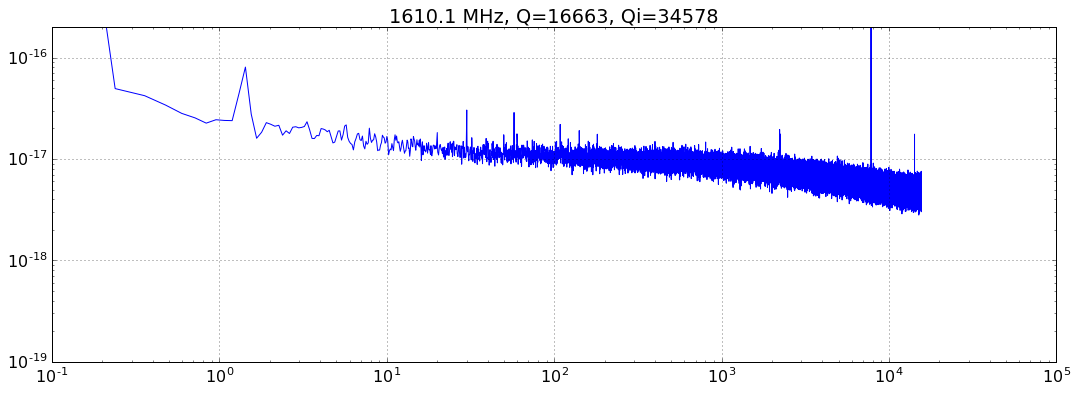

In [44]:
for snm in snms:
    ts = snm.normalized_timeseries[:]
    x = kid_readout.analysis.resonator.normalized_s21_to_detuning(ts,snm.resonator_model)
    cx,mask = kid_readout.utils.despike.deglitch_mask_mad(x,thresh=5,mask_extend=20,window_length=2**10)
    pxx_clean,fr_clean = mlab.psd(cx-cx.mean(),NFFT=2**18,Fs=512e6/2**14)
    figure(figsize=(18,6))
    loglog(fr_clean,pxx_clean)
    ylim(1e-19,2e-16)
    grid()
    title('%.1f MHz, Q=%d, Qi=%d' % (snm.resonator_model.f_0,snm.resonator_model.Q,snm.Q_i))

In [19]:
x.argmax()

11913921

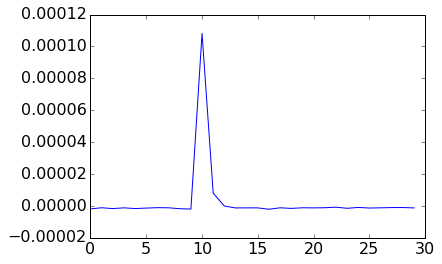

In [22]:
plot(x[_19-10:_19+20])